In [2]:
import scanpy as sc
import graph_tool.all as gt
import schist
import pandas as pd
import anndata
import pickle
import mygene
import scipy.stats
import statsmodels.api as sm
%pylab
%matplotlib inline

/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/all.py:40: RuntimeWarning: Error im

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [7]:
#weighted nSBM weighted model
w_weighted_l1=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_wiCELL8_l1.pkl','rb'))
#weighted nSBM flat model
w_flat_l1=pickle.load(open('cell_affinity_significance/minimize_linear_flat_wiCELL8_l1.pkl','rb'))
#unweighted nSBM weighted model
unw_weighted_l2=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_iCELL8_l2.pkl','rb'))
unw_weighted_l3=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_iCELL8_l3.pkl','rb'))
#unweighted nSBM flat model
unw_flat_l2=pickle.load(open('cell_affinity_significance/minimize_linear_flat_iCELL8_l2.pkl','rb'))
unw_flat_l3=pickle.load(open('cell_affinity_significance/minimize_linear_flat_iCELL8_l3.pkl','rb'))

In [3]:
#weighted nSBM
adata=schist.io.read('../scRNA_paga/state_adata/iCELL8_minimize_weighted')
#weight model
weighted_w_info_l1=load('cell_affinity_significance/wiCELL8_weighted_level_1.npz')
weighted_w_info_l2=load('cell_affinity_significance/wiCELL8_weighted_level_2.npz')
weighted_w_info_l3=load('cell_affinity_significance/wiCELL8_weighted_level_3.npz')
#flat model
weighted_f_info_l1=load('cell_affinity_significance/wiCELL8_flat_level_1.npz')
weighted_f_info_l2=load('cell_affinity_significance/wiCELL8_flat_level_2.npz')
weighted_f_info_l3=load('cell_affinity_significance/wiCELL8_flat_level_3.npz')

In [19]:
#unweighted nSBM
adata=schist.io.read('../scRNA_paga/state_adata/iCELL8_minimize')
#weight model
unweighted_w_info_l2=load('cell_affinity_significance/iCELL8_weighted_level_2.npz')
unweighted_w_info_l3=load('cell_affinity_significance/iCELL8_weighted_level_3.npz')
#flat model
unweighted_f_info_l2=load('cell_affinity_significance/iCELL8_flat_level_2.npz')
unweighted_f_info_l3=load('cell_affinity_significance/iCELL8_flat_level_3.npz')

In [5]:
markers=pd.read_excel("markers_hca.ods", engine="odf",header=2,index_col=None)

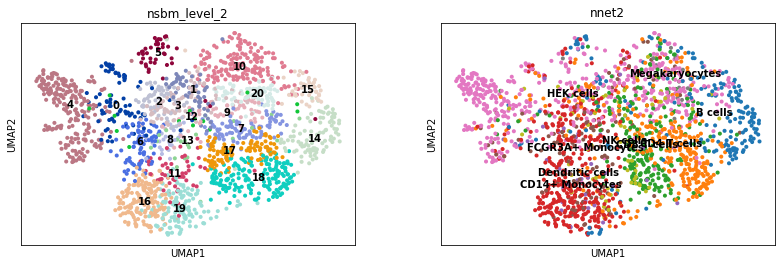

In [26]:
sc.pl.umap(adata,color=['nsbm_level_2','nnet2'],legend_loc ='on data')

In [24]:
np.sum(w_padj_l1<1e-2,axis=0)

array([ 372,    9,    9,  906, 1997,   23,   26,    8,   11,  164,  222,
         39,  370,   76, 1613,   67])

# 1) Number of genes
### flat model

In [21]:
w=weighted_w_info_l1
f=weighted_f_info_l1
w_pvals=w['pvals']
w_fdr=w['fdr']
w_scores=w['scores']
f_pvals=f['pvals']
f_fdr=f['fdr']
f_scores=f['scores']

(array([2315.,  354.,  264.,  215.,  225.,  191.,  224.,  252.,  249.,
         315.,  327.,  353.,  447.,  476.,  558.,  669.,  614.,  539.,
         494.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

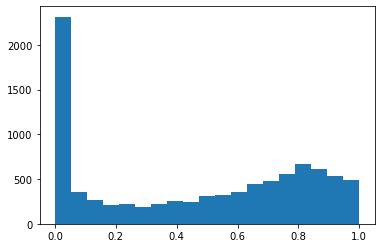

In [14]:
hist(f_padj_l1[:,4],bins=np.linspace(0,1,20))

In [22]:
significative=0
for group in adata.obs.nsbm_level_2.cat.categories:
    sig_level=len([x for x in f_pvals_l2[:,int(group)] if x <0.05])
    significative=significative+sig_level
print(significative)

5974


### weighted model

(array([2589.,  351.,  268.,  213.,  235.,  234.,  261.,  235.,  258.,
         276.,  367.,  417.,  377.,  493.,  490.,  570.,  482.,  483.,
         482.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

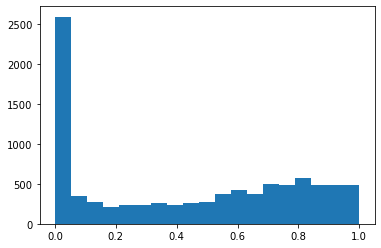

In [15]:
hist(w_padj_l1[:,4],bins=np.linspace(0,1,20))

In [23]:
significative=0
for group in adata.obs.nsbm_level_2.cat.categories:
    sig_level=len([x for x in w_pvals_l2[:,int(group)] if x <0.05])
    significative=significative+sig_level
print(significative)

5914


### scanpy

In [7]:
sc.tl.rank_genes_groups(adatam,groupby='nsbm_level_2',n_genes=-1)

/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 7329.,
        1751.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

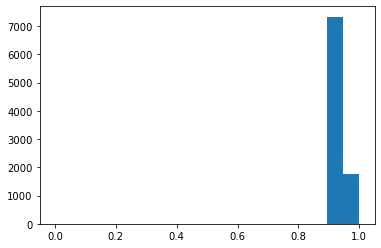

In [10]:
hist([adatam.uns['rank_genes_groups']['pvals_adj'][x][9] for x in range(9080)],bins=np.linspace(0,1,20))

# 2) Markers

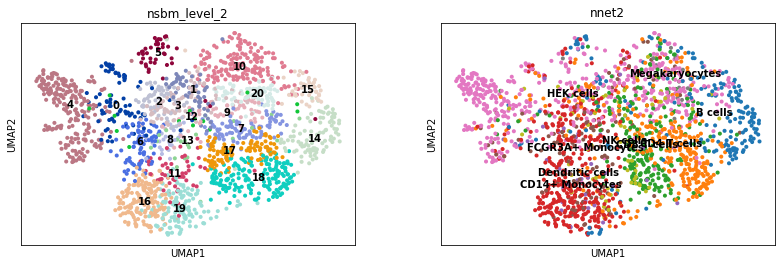

nnet2,B cells,CD4 T cells,CD8 T cells,CD14+ Monocytes,Dendritic cells,FCGR3A+ Monocytes,HEK cells,Megakaryocytes,NK cells
nsbm_level_2,,,,,,,,,
0,1,9,5,17,3,3,39,0,2
1,6,9,18,0,1,0,16,0,6
2,2,13,4,13,1,4,28,0,0
3,3,4,1,21,0,12,30,0,6
4,4,7,3,10,2,7,185,0,2
5,16,2,1,6,0,0,16,1,0
6,2,0,0,55,6,14,4,0,1
7,3,49,24,0,0,1,11,0,1
8,0,1,0,16,1,4,2,0,2


In [11]:
sc.pl.umap(adata, color=['nsbm_level_2','nnet2'],legend_loc='on data')
pd.crosstab(adata.obs['nsbm_level_2'],adata.obs['nnet2'])

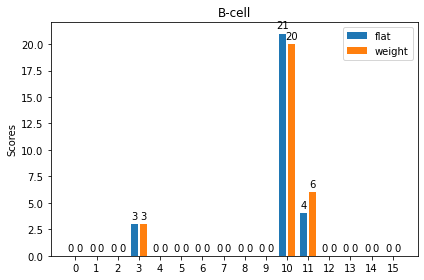

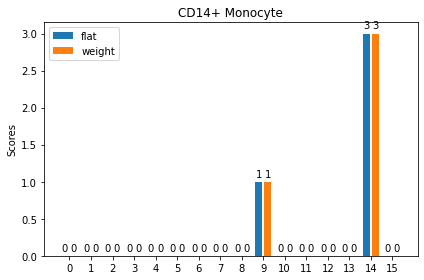

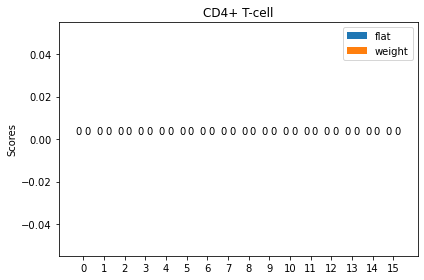

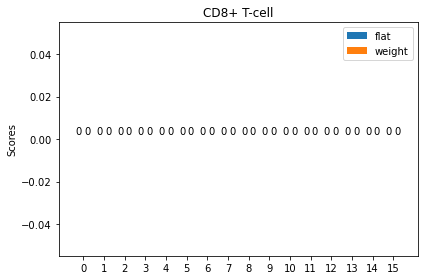

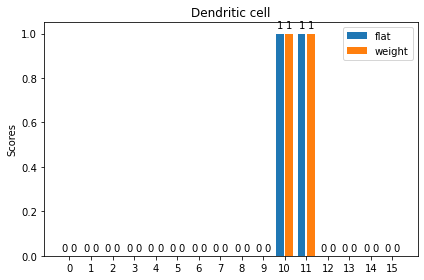

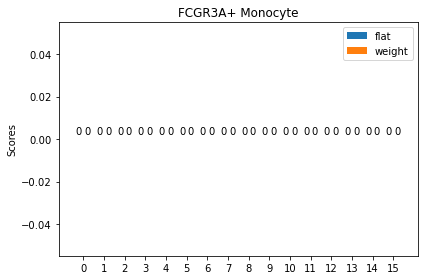

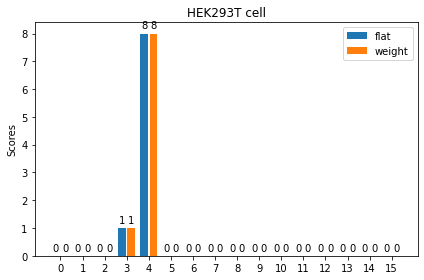

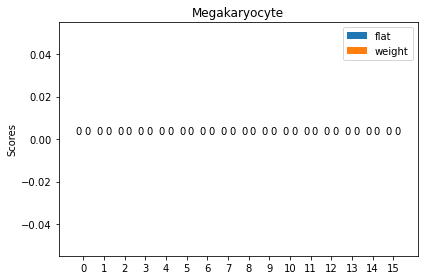

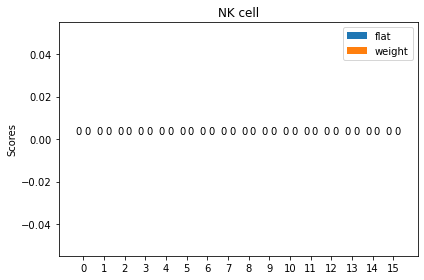

In [8]:
for celltype in range(len(markers.columns)):
    wm=[]
    fm=[]
    flat=0
    weight=0
    gene=[str(i) for i in markers.iloc[:,celltype]]
    for i in adata.obs['nsbm_level_1'].cat.categories:
        high_exp=[d for d in w_flat_l1[i]['scores'] if d>1]
        for j in range(len(high_exp)):
            if w_flat_l1[i]['gene_names'][j] in gene:
                flat=flat+1
        fm.append(flat)
        flat=0
        high_exp=[d for d in w_weighted_l1[i]['scores'] if d>1]
        for s in range(len(high_exp)):
            if w_weighted_l1[i]['gene_names'][s] in gene:
                weight=weight+1
        wm.append(weight)
        weight=0
    labels = adata.obs['nsbm_level_1'].cat.categories
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 0.6*width, fm, width, label='flat')
    rects2 = ax.bar(x + 0.6*width, wm, width, label='weight')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(f'{markers.columns[celltype]}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    plt.show()


In [32]:
g=str(13)
sco=0
for j in w_weighted_l1[g]['scores']:
    if j>1:
        sco=sco+1
print('weighted:',sco)
sco=0
for j in w_flat_l1[g]['scores']:
    if j>1:
        sco=sco+1
print('flat:',sco)

weighted: 0
flat: 0


In [18]:
sco=0
for x in w_flat_l1[g]['scores']:

    

[0.979463032162313,
 0.9254231220868396,
 0.9168746212190516,
 0.875343251158784,
 0.8456312009673725,
 0.8373064164462485,
 0.830353811867075,
 0.7983627474428898,
 0.7842407132172982,
 0.7480862533117819,
 0.728411727833545,
 0.7243411639810676,
 0.7017291036621871,
 0.7006535322330938,
 0.6981546315697353,
 0.697807712129134,
 0.680468506474446,
 0.6784183217738206,
 0.6765071789729721,
 0.674085136829838,
 0.638425315582802,
 0.6377533404531076,
 0.6241045908996606,
 0.6239729150399183,
 0.6232409818483536,
 0.6174470744882297,
 0.6168968207034179,
 0.6166421953543936,
 0.611227842196602,
 0.5979892307755627,
 0.5906245876930989,
 0.589598073963787,
 0.5847698528566155,
 0.5844401534448742,
 0.583241909708148,
 0.5783562511192796,
 0.5768238809378773,
 0.5761075938737671,
 0.5726009454090991,
 0.5710239810310744,
 0.5709418987683622,
 0.5618318634777235,
 0.5611326112257962,
 0.5592036949095186,
 0.5559873960050575,
 0.5534692020117385,
 0.5512238189258158,
 0.544996403227693,
 0.5

In [11]:
w_flat_l1

{'n_cells': 1829,
 '0': {'n_obs': 117,
  'n_significative': 952,
  'scores': [0.979463032162313,
   0.9254231220868396,
   0.9168746212190516,
   0.875343251158784,
   0.8456312009673725,
   0.8373064164462485,
   0.830353811867075,
   0.7983627474428898,
   0.7842407132172982,
   0.7480862533117819,
   0.728411727833545,
   0.7243411639810676,
   0.7017291036621871,
   0.7006535322330938,
   0.6981546315697353,
   0.697807712129134,
   0.680468506474446,
   0.6784183217738206,
   0.6765071789729721,
   0.674085136829838,
   0.638425315582802,
   0.6377533404531076,
   0.6241045908996606,
   0.6239729150399183,
   0.6232409818483536,
   0.6174470744882297,
   0.6168968207034179,
   0.6166421953543936,
   0.611227842196602,
   0.5979892307755627,
   0.5906245876930989,
   0.589598073963787,
   0.5847698528566155,
   0.5844401534448742,
   0.583241909708148,
   0.5783562511192796,
   0.5768238809378773,
   0.5761075938737671,
   0.5726009454090991,
   0.5710239810310744,
   0.57094189876